# ARC Neural Program Generation

This notebook loads and analyzes the ARC (Abstraction and Reasoning Corpus) dataset for neural program generation tasks.

## Dataset Overview
The ARC dataset contains:
- **Training challenges**: Tasks with input/output examples and test inputs
- **Training solutions**: Expected outputs for test inputs
- **Evaluation challenges**: Similar format for evaluation
- **Test challenges**: Final test set (no solutions provided)

In [ ]:
# Import the refactored classes and functions from src module
from src import ARCGrid, ARCExample, ARCTask, ARCDataset
from src.analysis import (
    analyze_grid_sizes,
    detailed_grid_size_analysis,
    find_tasks_by_color_count,
    find_shape_preserving_tasks,
    analyze_size_categories,
    find_size_outliers,
    find_grids_by_shape
)
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up paths to data files
DATA_DIR = Path("data")
TRAINING_CHALLENGES = DATA_DIR / "arc-agi_training_challenges.json"
TRAINING_SOLUTIONS = DATA_DIR / "arc-agi_training_solutions.json"
EVALUATION_CHALLENGES = DATA_DIR / "arc-agi_evaluation_challenges.json"
EVALUATION_SOLUTIONS = DATA_DIR / "arc-agi_evaluation_solutions.json"
TEST_CHALLENGES = DATA_DIR / "arc-agi_test_challenges.json"
SAMPLE_SUBMISSION = DATA_DIR / "sample_submission.json"

print("Data files:")
for file_path in [TRAINING_CHALLENGES, TRAINING_SOLUTIONS, EVALUATION_CHALLENGES, 
                  EVALUATION_SOLUTIONS, TEST_CHALLENGES, SAMPLE_SUBMISSION]:
    if file_path.exists():
        size_mb = file_path.stat().st_size / (1024 * 1024)
        print(f"✓ {file_path.name}: {size_mb:.1f} MB")
    else:
        print(f"✗ {file_path.name}: NOT FOUND")


Data files:
✓ arc-agi_training_challenges.json: 3.8 MB
✓ arc-agi_training_solutions.json: 0.6 MB
✓ arc-agi_evaluation_challenges.json: 0.9 MB
✓ arc-agi_evaluation_solutions.json: 0.2 MB
✓ arc-agi_test_challenges.json: 1.0 MB
✓ sample_submission.json: 0.0 MB


In [5]:
# Now let's load the ARC dataset and explore it
print("Initializing ARC dataset...")
arc_dataset = ARCDataset()

# Load training data first
arc_dataset.load_training_data()

print(f"\nDataset loaded successfully!")
print(f"Training tasks: {len(arc_dataset.training_tasks)}")

# Show some basic statistics
stats = arc_dataset.get_dataset_stats()
train_stats = stats['training']

print(f"\nTraining Set Statistics:")
print(f"- Number of tasks: {train_stats['num_tasks']}")
print(f"- Total examples: {train_stats['total_examples']}")
print(f"- Unique grid shapes: {train_stats['unique_shapes']}")
print(f"- Max grid dimension: {train_stats['max_grid_size']}")
print(f"- Colors used: {train_stats['colors_used']}")
print(f"- Unique shape changes: {train_stats['unique_shape_changes']}")


Initializing ARC dataset...
Loading training data from data/arc-agi_training_challenges.json
Loaded 1000 training tasks

Dataset loaded successfully!
Training tasks: 1000

Training Set Statistics:
- Number of tasks: 1000
- Total examples: 3232
- Unique grid shapes: 456
- Max grid dimension: 30
- Colors used: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
- Unique shape changes: 285


Examining task: 00576224
Task statistics:
  task_id: 00576224
  num_train_examples: 2
  train_input_shapes: [(2, 2), (2, 2)]
  train_output_shapes: [(6, 6), (6, 6)]
  test_input_shape: (2, 2)
  test_output_shape: (6, 6)
  all_colors_used: [2, 3, 4, 6, 7, 8, 9]
  shape_changes: [(4, 4), (4, 4)]
  consistent_shape_change: True
  max_grid_size: 6

Detailed analysis:
- Number of training examples: 2
- Test input shape: (2, 2)
- All colors used: [2, 3, 4, 6, 7, 8, 9]
- Shape changes consistent: True

First training example:
  Input shape: (2, 2)
  Output shape: (6, 6)
  Shape change: (4, 4)
  Input colors: [3, 4, 7, 9]
  Output colors: [3, 4, 7, 9]

  Input grid:

  Output grid:


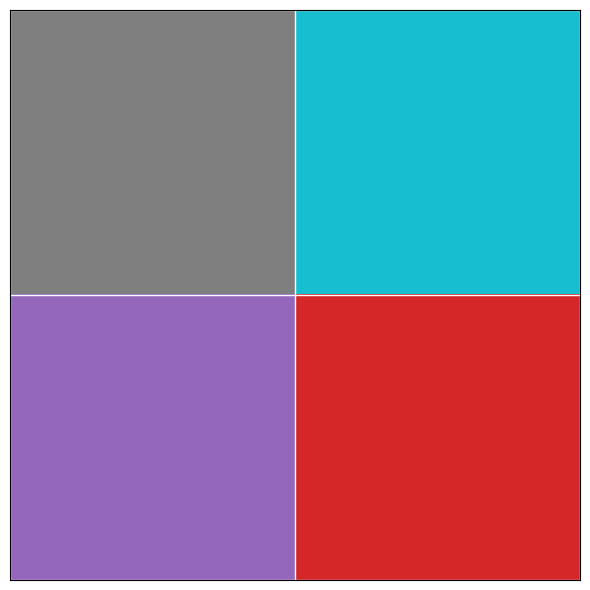

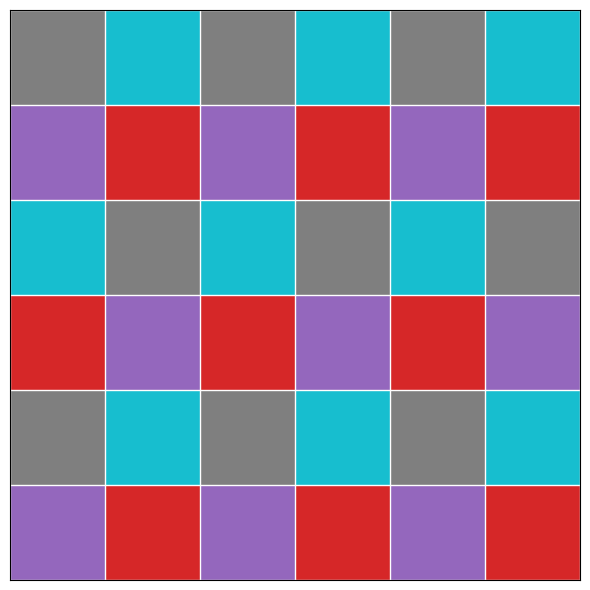

In [6]:
# Let's examine a specific task to demonstrate our data structure
sample_task_id = list(arc_dataset.training_tasks.keys())[0]
sample_task = arc_dataset.get_task(sample_task_id)

print(f"Examining task: {sample_task_id}")
print("="*50)

# Get detailed stats for this task
task_stats = sample_task.get_stats()
print(f"Task statistics:")
for key, value in task_stats.items():
    print(f"  {key}: {value}")

print(f"\nDetailed analysis:")
print(f"- Number of training examples: {sample_task.num_train_examples}")
print(f"- Test input shape: {sample_task.test_input_shape}")
print(f"- All colors used: {sorted(sample_task.all_colors_used)}")
print(f"- Shape changes consistent: {sample_task.consistent_shape_change}")

# Show the first training example
if sample_task.train_examples:
    first_example = sample_task.train_examples[0]
    print(f"\nFirst training example:")
    print(f"  Input shape: {first_example.input_shape}")
    print(f"  Output shape: {first_example.output_shape}")
    print(f"  Shape change: {first_example.shape_change}")
    print(f"  Input colors: {sorted(first_example.input_grid.unique_colors)}")
    print(f"  Output colors: {sorted(first_example.output_grid.unique_colors)}")
    
    # Print the grids in ASCII format
    print(f"\n  Input grid:")
    first_example.input_grid.visualize()
    print(f"\n  Output grid:")
    first_example.output_grid.visualize()


In [ ]:
# Analysis functions are now imported from src.analysis module
# analyze_grid_sizes, find_tasks_by_color_count, find_shape_preserving_tasks are available

# Run some analyses using imported functions
grid_sizes = analyze_grid_sizes(arc_dataset)
binary_tasks = find_tasks_by_color_count(arc_dataset, 2)  # Tasks using only 2 colors
shape_preserving = find_shape_preserving_tasks(arc_dataset)

print(f"\nExample binary task: {binary_tasks[0] if binary_tasks else 'None found'}")
print(f"Example shape-preserving task: {shape_preserving[0] if shape_preserving else 'None found'}")



Grid size analysis for training set:
- Total grids: 8464
- Min size: 1
- Max size: 900
- Average size: 167.0

Tasks using exactly 2 colors: 21

Shape-preserving tasks: 680

Example binary task: 1990f7a8
Example shape-preserving task: 009d5c81


In [ ]:
# detailed_grid_size_analysis is now imported from src.analysis module

# Run the detailed analysis using imported function
grid_data, shape_data = detailed_grid_size_analysis(arc_dataset)



DETAILED GRID SIZE ANALYSIS - TRAINING SET

Basic Statistics:
- Total grids analyzed: 8464
- Number of tasks: 1000

Height Statistics:
- Min height: 1
- Max height: 30
- Average height: 11.13
- Unique heights: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Width Statistics:
- Min width: 1
- Max width: 30
- Average width: 11.61
- Unique widths: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Grid Size (total cells) Statistics:
- Min size: 1
- Max size: 900
- Average size: 166.96

Shape Distribution:
- Total unique shapes: 456
- Most common shapes:
  1. 10x10: 987 grids (11.7%)
  2. 3x3: 636 grids (7.5%)
  3. 9x9: 351 grids (4.1%)
  4. 16x16: 300 grids (3.5%)
  5. 15x15: 280 grids (3.3%)
  6. 12x12: 234 grids (2.8%)
  7. 5x5: 230 grids (2.7%)
  8. 6x6: 207 grids (2.4%)
  9. 11x11: 197 grids (2.3%)
  10. 7x7: 196 grids (2.3%)

Aspect Ratio Analysis:
- Square 

In [ ]:
# Additional analysis functions are imported from src.analysis module
# analyze_size_categories, find_size_outliers are available

# Run additional analyses using imported functions
analyze_size_categories(grid_data)
find_size_outliers(grid_data)



GRID SIZE CATEGORIES
Tiny         (  1-  9 cells):  853 grids ( 10.1%)
Small        ( 10- 49 cells): 1652 grids ( 19.5%)
Medium       ( 50-225 cells): 3981 grids ( 47.0%)
Large        (226-400 cells): 1201 grids ( 14.2%)
Extra Large  (401-900 cells):  777 grids (  9.2%)

Extreme Cases:
- Smallest grids (1 cells):
  1x1 in task 1a2e2828 (train_output)
  1x1 in task 1a2e2828 (train_output)
  1x1 in task 1a2e2828 (train_output)
- Largest grids (900 cells):
  30x30 in task 05a7bcf2 (train_input)
  30x30 in task 05a7bcf2 (train_output)
  30x30 in task 05a7bcf2 (train_input)

DIMENSION ANALYSIS
Height Distribution (most common):
  10 rows: 1212 grids ( 14.3%)
   3 rows:  947 grids ( 11.2%)
   9 rows:  529 grids (  6.2%)
   5 rows:  449 grids (  5.3%)
  12 rows:  437 grids (  5.2%)
  16 rows:  433 grids (  5.1%)
  15 rows:  415 grids (  4.9%)
   6 rows:  397 grids (  4.7%)

Width Distribution (most common):
  10 cols: 1173 grids ( 13.9%)
   3 cols:  763 grids (  9.0%)
   9 cols:  532 grids (

In [10]:
# Let's also look at the evaluation set for comparison
print(f"\n{'='*60}")
print(f"LOADING EVALUATION SET FOR COMPARISON")
print(f"{'='*60}")

# Load evaluation data
arc_dataset.load_evaluation_data()

# Run the same analysis on evaluation set
eval_grid_data, eval_shape_data = detailed_grid_size_analysis(arc_dataset, "evaluation")

print(f"\n{'='*60}")
print(f"COMPARISON: TRAINING vs EVALUATION")
print(f"{'='*60}")

# Compare key metrics
train_sizes = [g['size'] for g in grid_data]
eval_sizes = [g['size'] for g in eval_grid_data]

train_heights = [g['height'] for g in grid_data]
eval_heights = [g['height'] for g in eval_grid_data]

train_widths = [g['width'] for g in grid_data]
eval_widths = [g['width'] for g in eval_grid_data]

print(f"Size Statistics Comparison:")
print(f"                    Training    Evaluation")
print(f"Min size:           {min(train_sizes):8}    {min(eval_sizes):8}")
print(f"Max size:           {max(train_sizes):8}    {max(eval_sizes):8}")
print(f"Average size:       {sum(train_sizes)/len(train_sizes):8.1f}    {sum(eval_sizes)/len(eval_sizes):8.1f}")

print(f"\nDimension Comparison:")
print(f"                    Training    Evaluation")
print(f"Min height:         {min(train_heights):8}    {min(eval_heights):8}")
print(f"Max height:         {max(train_heights):8}    {max(eval_heights):8}")
print(f"Min width:          {min(train_widths):8}    {min(eval_widths):8}")
print(f"Max width:          {max(train_widths):8}    {max(eval_widths):8}")

# Check if there are any shapes in eval that aren't in training
train_shapes_set = set(shape_data)
eval_shapes_set = set(eval_shape_data)

eval_only_shapes = eval_shapes_set - train_shapes_set
train_only_shapes = train_shapes_set - eval_shapes_set

print(f"\nShape Coverage:")
print(f"- Training unique shapes: {len(train_shapes_set)}")
print(f"- Evaluation unique shapes: {len(eval_shapes_set)}")
print(f"- Shapes only in training: {len(train_only_shapes)}")
print(f"- Shapes only in evaluation: {len(eval_only_shapes)}")

if eval_only_shapes:
    print(f"\nShapes in evaluation but not training:")
    for shape in sorted(list(eval_only_shapes))[:10]:
        print(f"  {shape[0]}x{shape[1]}")

if train_only_shapes:
    print(f"\nShapes in training but not evaluation:")
    for shape in sorted(list(train_only_shapes))[:10]:
        print(f"  {shape[0]}x{shape[1]}")

print(f"\nCommon shapes between sets: {len(train_shapes_set & eval_shapes_set)}")
print(f"Total unique shapes across both sets: {len(train_shapes_set | eval_shapes_set)}")



LOADING EVALUATION SET FOR COMPARISON
Loading evaluation data from data/arc-agi_evaluation_challenges.json
Loaded 120 evaluation tasks

DETAILED GRID SIZE ANALYSIS - EVALUATION SET

Basic Statistics:
- Total grids analyzed: 956
- Number of tasks: 120

Height Statistics:
- Min height: 2
- Max height: 30
- Average height: 17.56
- Unique heights: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Width Statistics:
- Min width: 1
- Max width: 30
- Average width: 18.03
- Unique widths: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Grid Size (total cells) Statistics:
- Min size: 10
- Max size: 900
- Average size: 355.72

Shape Distribution:
- Total unique shapes: 218
- Most common shapes:
  1. 30x30: 76 grids (7.9%)
  2. 20x20: 66 grids (6.9%)
  3. 16x16: 60 grids (6.3%)
  4. 10x10: 52 grids (5.4%)
  5. 12x12: 43 grids (4.5%)
  6. 22x22: 43 grids (4.5%)
  7. 18x18: 2

In [11]:
# Summary and practical insights for neural program generation
print(f"\n{'='*60}")
print(f"PRACTICAL INSIGHTS FOR NEURAL PROGRAM GENERATION")
print(f"{'='*60}")

# Combine data from both sets for overall analysis
all_grid_data = grid_data + eval_grid_data
all_sizes = [g['size'] for g in all_grid_data]
all_heights = [g['height'] for g in all_grid_data]
all_widths = [g['width'] for g in all_grid_data]

print(f"\nOverall ARC Dataset Grid Statistics:")
print(f"- Total grids analyzed: {len(all_grid_data)}")
print(f"- Size range: {min(all_sizes)} to {max(all_sizes)} cells")
print(f"- Height range: {min(all_heights)} to {max(all_heights)} rows")
print(f"- Width range: {min(all_widths)} to {max(all_widths)} columns")
print(f"- Average grid size: {sum(all_sizes)/len(all_sizes):.1f} cells")

# Recommendations based on analysis
print(f"\nRecommendations for Neural Architecture:")

# Memory requirements
max_size = max(all_sizes)
typical_size = int(sum(all_sizes)/len(all_sizes))
print(f"1. Memory Planning:")
print(f"   - Maximum grid size: {max_size} cells")
print(f"   - Typical grid size: {typical_size} cells") 
print(f"   - Recommend supporting up to {max_size} cells per grid")

# Input representation
max_height = max(all_heights)
max_width = max(all_widths)
print(f"\n2. Input Representation:")
print(f"   - Maximum dimensions: {max_height}×{max_width}")
print(f"   - Consider padding strategy for variable sizes")
print(f"   - Most grids are much smaller than maximum")

# Architecture considerations
square_count = sum(1 for g in all_grid_data if g['is_square'])
print(f"\n3. Architecture Considerations:")
print(f"   - {square_count/len(all_grid_data)*100:.1f}% of grids are square")
print(f"   - Need to handle rectangular grids effectively")
print(f"   - Consider separate encoders for height/width dimensions")

# Processing efficiency
small_grids = sum(1 for s in all_sizes if s <= 49)  # 7x7 or smaller
medium_grids = sum(1 for s in all_sizes if 50 <= s <= 225)  # 8x8 to 15x15
large_grids = sum(1 for s in all_sizes if s > 225)

print(f"\n4. Processing Efficiency:")
print(f"   - Small grids (≤49 cells): {small_grids/len(all_grid_data)*100:.1f}%")
print(f"   - Medium grids (50-225 cells): {medium_grids/len(all_grid_data)*100:.1f}%")
print(f"   - Large grids (>225 cells): {large_grids/len(all_grid_data)*100:.1f}%")
print(f"   - Most computation on small-medium grids")

# Model capacity planning
unique_shapes = len(set([(g['height'], g['width']) for g in all_grid_data]))
print(f"\n5. Model Capacity:")
print(f"   - Need to handle {unique_shapes} unique grid shapes")
print(f"   - Consider shape-agnostic architectures")
print(f"   - Or shape-specific sub-networks for common sizes")

print(f"\n{'='*60}")
print(f"QUICK ACCESS FUNCTIONS")
print(f"{'='*60}")
print(f"# Get a specific task:")
print(f"task = arc_dataset.get_task('task_id')")
print(f"")
print(f"# Get grid dimensions:")
print(f"height, width = task.test_input.shape")
print(f"total_cells = task.test_input.size") 
print(f"")
print(f"# Check if task preserves shape:")
print(f"is_shape_preserving = task.consistent_shape_change and task.shape_changes[0] == (0, 0)")
print(f"")
print(f"# Find tasks by size:")
print(f"small_tasks = [t for t in arc_dataset.training_tasks.values() if max(t.test_input.shape) <= 10]")
print(f"")
print(f"# Get task statistics:")
print(f"stats = task.get_stats()")

print(f"\nData structure is ready for neural program generation research!")



PRACTICAL INSIGHTS FOR NEURAL PROGRAM GENERATION

Overall ARC Dataset Grid Statistics:
- Total grids analyzed: 9420
- Size range: 1 to 900 cells
- Height range: 1 to 30 rows
- Width range: 1 to 30 columns
- Average grid size: 186.1 cells

Recommendations for Neural Architecture:
1. Memory Planning:
   - Maximum grid size: 900 cells
   - Typical grid size: 186 cells
   - Recommend supporting up to 900 cells per grid

2. Input Representation:
   - Maximum dimensions: 30×30
   - Consider padding strategy for variable sizes
   - Most grids are much smaller than maximum

3. Architecture Considerations:
   - 61.7% of grids are square
   - Need to handle rectangular grids effectively
   - Consider separate encoders for height/width dimensions

4. Processing Efficiency:
   - Small grids (≤49 cells): 27.1%
   - Medium grids (50-225 cells): 45.7%
   - Large grids (>225 cells): 27.2%
   - Most computation on small-medium grids

5. Model Capacity:
   - Need to handle 514 unique grid shapes
   - C

Searching for 30x30 grids in the dataset...
Found 233 grids with 30x30 dimensions

Displaying 30x30 grid example:
- Task ID: 05a7bcf2
- Type: train_input
- Dataset: training
- Grid shape: (30, 30)
- Total cells: 900
- Colors used: [0, 2, 4, 8]
- Color counts: {0: 801, 8: 30, 2: 56, 4: 13}

Looking for input-output pairs with 30x30 grids...
Found 30x30 input-output pair!
- Task ID: 05a7bcf2
- Training example: 0
- Dataset: training

Input Grid Analysis:
- Shape: (30, 30)
- Colors used: [0, 2, 4, 8]
- Color counts: {0: 801, 8: 30, 2: 56, 4: 13}

Output Grid Analysis:
- Shape: (30, 30)
- Colors used: [0, 2, 3, 4, 8]
- Color counts: {0: 623, 8: 173, 2: 56, 3: 13, 4: 35}


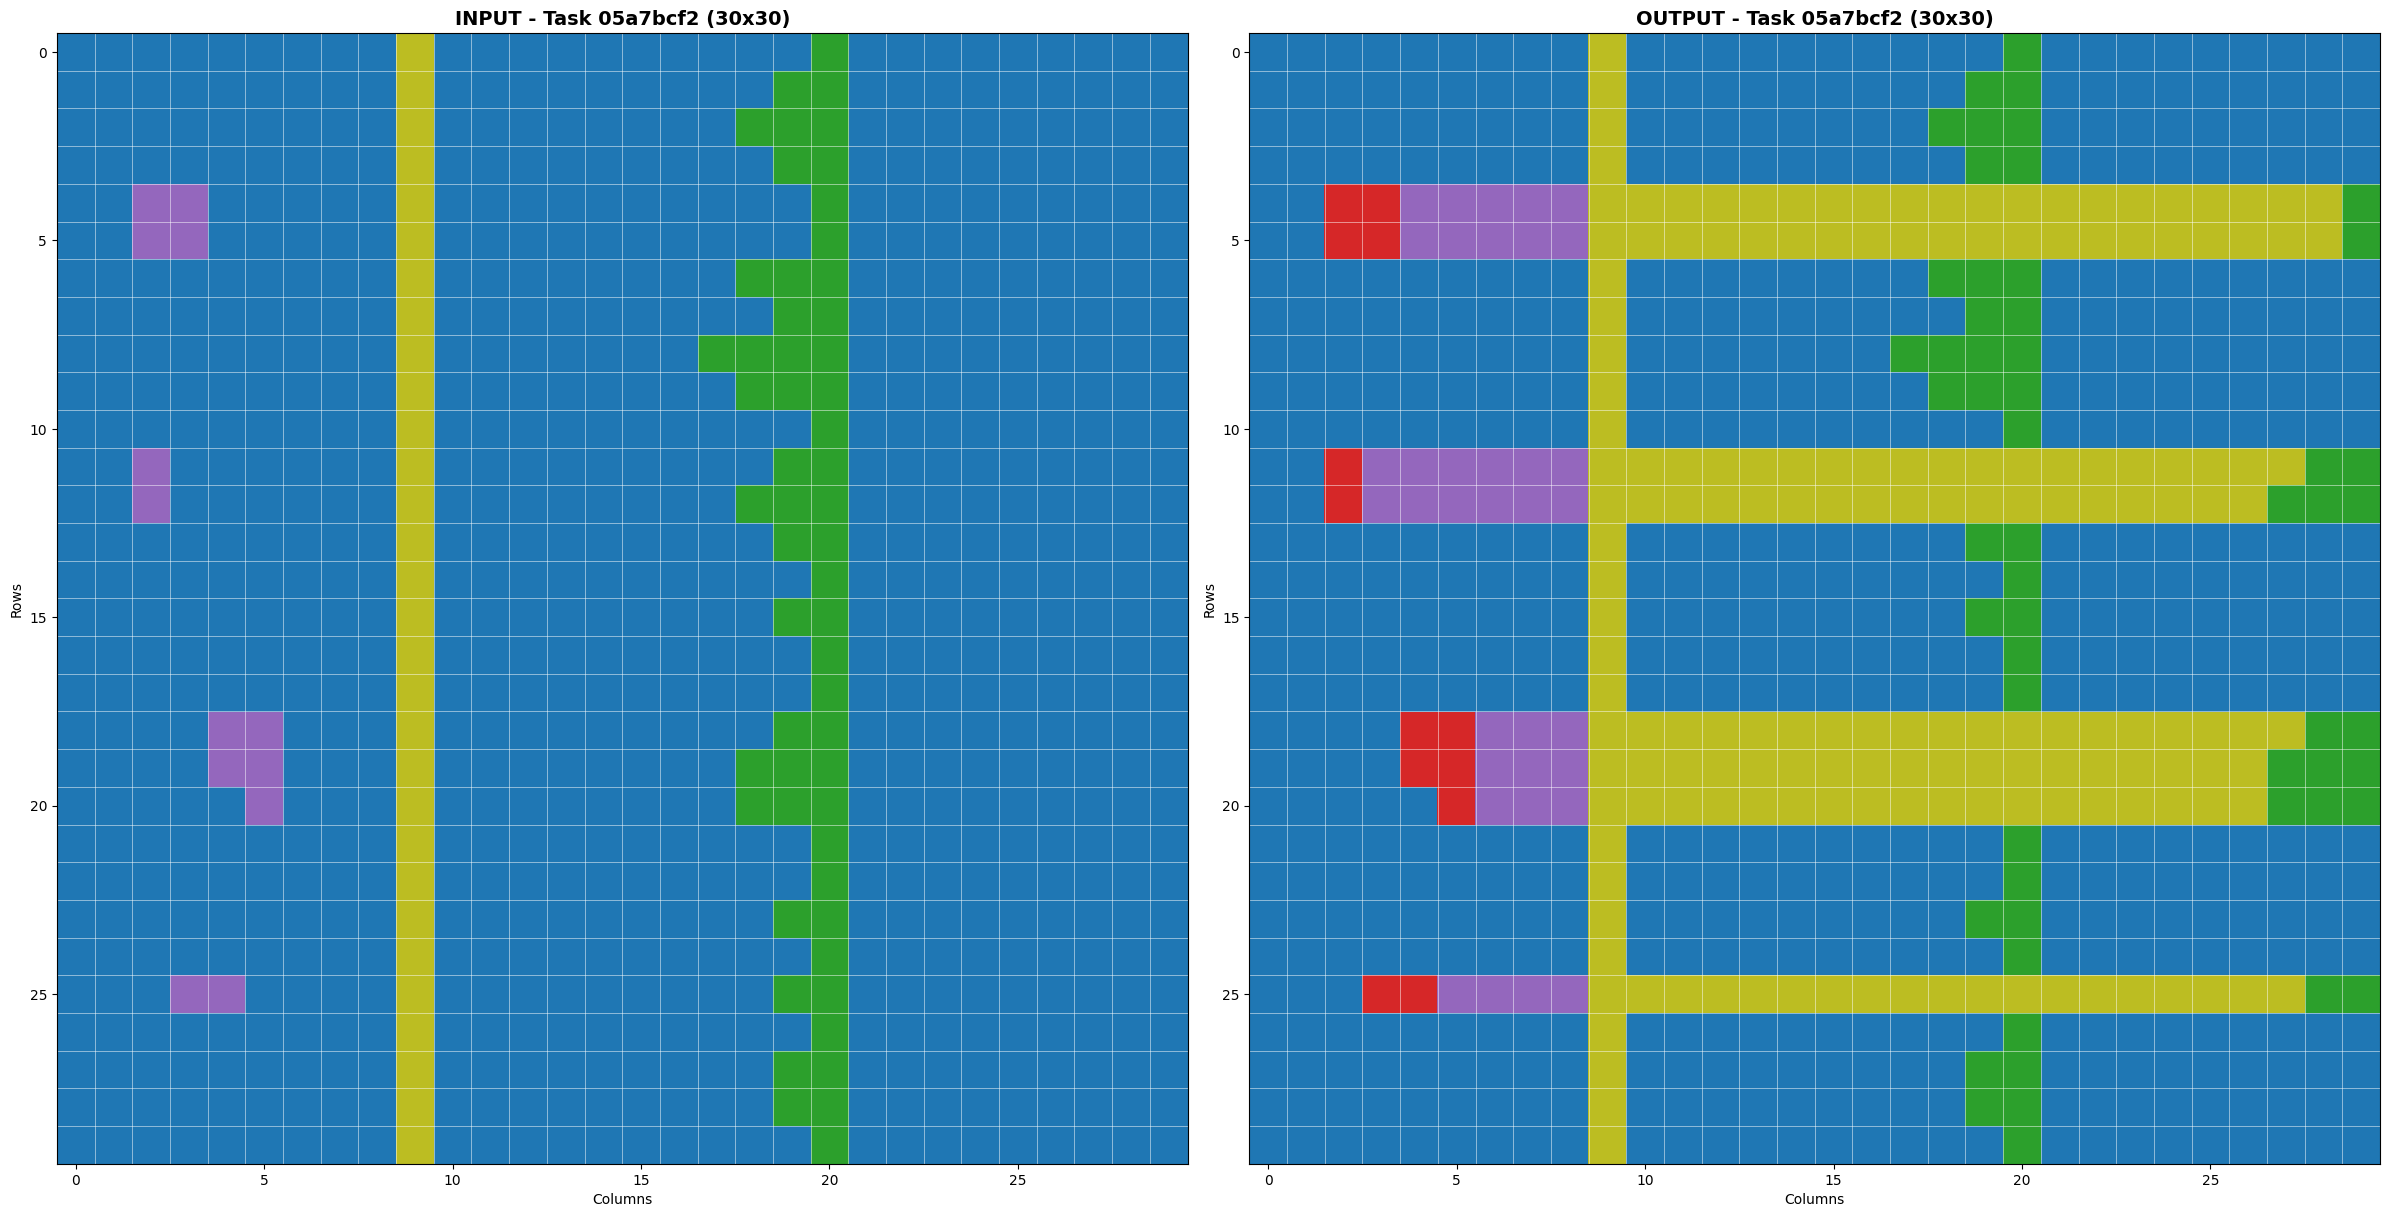


Transformation Analysis:
- Colors added: {3}
- Colors removed: set()
- Colors preserved: {0, 8, 2, 4}
- Grids are identical: False

Other tasks with 30x30 grids:
  - 05a7bcf2 (training set)
  - 09c534e7 (training set)

Total 30x30 grids found: 233


In [ ]:
# Find and display an example 30x30 grid using the imported function
print("Searching for 30x30 grids in the dataset...")

# Use the imported find_30x30_grids function
large_grid_examples = find_grids_by_shape(arc_dataset, (30, 30))

print(f"Found {len(large_grid_examples)} grids with 30x30 dimensions")

if large_grid_examples:
    # Pick the first example
    example = large_grid_examples[0]
    grid = example['grid']
    
    print(f"\nDisplaying 30x30 grid example:")
    print(f"- Task ID: {example['task_id']}")
    print(f"- Type: {example['type']}")
    print(f"- Dataset: {example['dataset']}")
    print(f"- Grid shape: {grid.shape}")
    print(f"- Total cells: {grid.size}")
    print(f"- Colors used: {sorted(grid.unique_colors)}")
    print(f"- Color counts: {grid.color_counts}")
    
    # Find input-output pairs for 30x30 grids
    print(f"\nLooking for input-output pairs with 30x30 grids...")
    
    # Try to find a training example with both input and output as 30x30
    input_output_pair = None
    for task_id, task in list(arc_dataset.training_tasks.items()) + list(arc_dataset.evaluation_tasks.items()):
        for i, train_example in enumerate(task.train_examples):
            if (train_example.input_grid.shape == (30, 30) and 
                train_example.output_grid.shape == (30, 30)):
                input_output_pair = {
                    'task_id': task_id,
                    'example_idx': i,
                    'input_grid': train_example.input_grid,
                    'output_grid': train_example.output_grid,
                    'dataset': 'training' if task_id in arc_dataset.training_tasks else 'evaluation'
                }
                break
        if input_output_pair:
            break
    
    if input_output_pair:
        print(f"Found 30x30 input-output pair!")
        print(f"- Task ID: {input_output_pair['task_id']}")
        print(f"- Training example: {input_output_pair['example_idx']}")
        print(f"- Dataset: {input_output_pair['dataset']}")
        
        input_grid = input_output_pair['input_grid']
        output_grid = input_output_pair['output_grid']
        
        print(f"\nInput Grid Analysis:")
        print(f"- Shape: {input_grid.shape}")
        print(f"- Colors used: {sorted(input_grid.unique_colors)}")
        print(f"- Color counts: {dict(list(input_grid.color_counts.items())[:5])}{'...' if len(input_grid.color_counts) > 5 else ''}")
        
        print(f"\nOutput Grid Analysis:")
        print(f"- Shape: {output_grid.shape}")
        print(f"- Colors used: {sorted(output_grid.unique_colors)}")
        print(f"- Color counts: {dict(list(output_grid.color_counts.items())[:5])}{'...' if len(output_grid.color_counts) > 5 else ''}")
        
        # Create side-by-side visualization
        import matplotlib.pyplot as plt
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
        
        # Plot input grid
        im1 = ax1.imshow([[cell for cell in row] for row in input_grid.data], 
                        cmap='tab10', vmin=0, vmax=9)
        ax1.set_title(f"INPUT - Task {input_output_pair['task_id']} (30x30)", fontsize=14, fontweight='bold')
        ax1.set_xlabel("Columns")
        ax1.set_ylabel("Rows")
        
        # Add grid lines for input
        for i in range(31):
            ax1.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.7)
            ax1.axvline(i - 0.5, color='white', linewidth=0.5, alpha=0.7)
        
        # Plot output grid
        im2 = ax2.imshow([[cell for cell in row] for row in output_grid.data], 
                        cmap='tab10', vmin=0, vmax=9)
        ax2.set_title(f"OUTPUT - Task {input_output_pair['task_id']} (30x30)", fontsize=14, fontweight='bold')
        ax2.set_xlabel("Columns")
        ax2.set_ylabel("Rows")
        
        # Add grid lines for output
        for i in range(31):
            ax2.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.7)
            ax2.axvline(i - 0.5, color='white', linewidth=0.5, alpha=0.7)
        
        plt.tight_layout()
        plt.show()
        
        # Show transformation analysis
        print(f"\nTransformation Analysis:")
        input_colors = set(input_grid.unique_colors)
        output_colors = set(output_grid.unique_colors)
        print(f"- Colors added: {output_colors - input_colors}")
        print(f"- Colors removed: {input_colors - output_colors}")
        print(f"- Colors preserved: {input_colors & output_colors}")
        
        # Check if grids are identical
        are_identical = input_grid.data == output_grid.data
        print(f"- Grids are identical: {are_identical}")
        
    else:
        # If no input-output pair found, show individual 30x30 grid
        print(f"No input-output pair found with both grids being 30x30.")
        print(f"Showing individual 30x30 grid:")
        
        grid.visualize(f"30x30 Grid - Task {example['task_id']} ({example['type']})", figsize=(12, 12))
    
    # Also show some sample tasks that contain 30x30 grids
    print(f"\nOther tasks with 30x30 grids:")
    unique_tasks = set()
    for ex in large_grid_examples[:10]:  # Show first 10
        if ex['task_id'] not in unique_tasks:
            unique_tasks.add(ex['task_id'])
            print(f"  - {ex['task_id']} ({ex['dataset']} set)")
            
    print(f"\nTotal 30x30 grids found: {len(large_grid_examples)}")
            
else:
    print("No 30x30 grids found in the loaded datasets.")
